In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# ... and for the statistic
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
    
# To get reproducable values, I provide a seed value
np.random.seed(987654321)   

Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

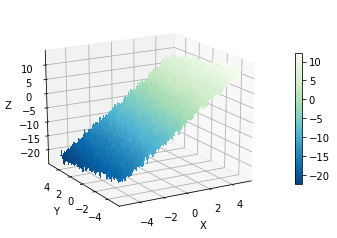

In [3]:
# Set the color
myCmap = cm.GnBu_r
    
# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=myCmap, rstride=2, cstride=2, linewidth=0, antialiased=False)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)
plt.show()

In [9]:
X=X.flatten()
Y=Y.flatten()
Z=Z.flatten()

# Zadanie
Wykonaj regresję

- za pomocą from <tt>statsmodels.formula.api.ols</tt>
- za pomocą from <tt>sklearn.linear_model</tt>

Porównaj wyniki.

In [40]:
import statsmodels.formula.api as smf
import sklearn.linear_model as lm

In [41]:
D = pd.DataFrame({'X':X,'Y':Y, 'Z':Z})
D.head()

,X,Y,Z
0,-5.0,-5.0,-15.253449
1,-4.9,-5.0,-17.845918
2,-4.8,-5.0,-18.083577
3,-4.7,-5.0,-14.670507
4,-4.6,-5.0,-16.233186


In [42]:
model = smf.ols(formula='Z ~ X + Y', data = D)
res = model.fit()
print(res.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.987     
Dependent Variable: Z                AIC:                29008.1531
Date:               2018-05-26 12:06 BIC:                29029.8438
No. Observations:   10201            Log-Likelihood:     -14501.   
Df Model:           2                F-statistic:        3.997e+05 
Df Residuals:       10198            Prob (F-statistic): 0.00      
R-squared:          0.987            Scale:              1.0055    
--------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     -4.9975    0.0099  -503.3693  0.0000  -5.0170  -4.9781
X              3.0025    0.0034   881.7034  0.0000   2.9958   3.0092
Y             -0.5051    0.0034  -148.3402  0.0000  -0.5118  -0.4985
------------------------------------------------------------